# Agent Class Examples

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable
from tqdm import tqdm

In [2]:
from neuralplayground.agents import AgentCore, RandomAgent, LevyFlightAgent, Weber2018

In [3]:
agent = LevyFlightAgent()

In [4]:
from neuralplayground.arenas import Simple2D, ConnectedRooms

In [5]:
time_step_size = 0.1 #sec
agent_step_size = 3

# Init environment
env = Simple2D(time_step_size = time_step_size,
               agent_step_size = agent_step_size,
               arena_x_limits=(-100, 100), 
               arena_y_limits=(-100, 100))

In [6]:
n_steps = 10000

# Initialize environment
obs, state = env.reset()
for i in range(n_steps):
    # Observe to choose an action
    action = agent.act(obs)
    # Run environment for given action
    # print(action)
    obs, state, reward = env.step(action)

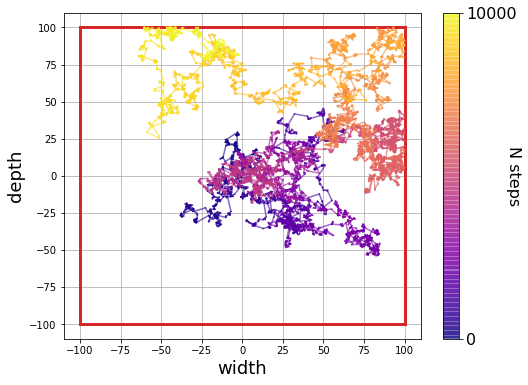

In [7]:
ax = env.plot_trajectory()
fontsize = 18
ax.grid()
# ax.legend(fontsize=fontsize, loc="upper left")
ax.set_xlabel("width", fontsize=fontsize)
ax.set_ylabel("depth", fontsize=fontsize)
# plt.savefig("two_rooms.pdf", bbox_inches="tight")
plt.show()

## Weber 2018

In [8]:
# Create an env
room_width = [-10,10]
room_depth = [-10,10]
env_name = "env_example"
time_step_size = 1
agent_step_size = 0.5

# Init environment
envsimple = Simple2D(arena_x_limits = room_width,
                     arena_y_limits = room_depth,
                     time_step_size = time_step_size,
                     agent_step_size = agent_step_size)

In [9]:
exc_eta = 2e-4
inh_eta = 8e-4
model_name = "model_example"
sigma_exc = np.array([0.05, 0.05])
sigma_inh = np.array([0.1, 0.1])
Ne = 4900
Ni = 1225
Nef = 1
Nif = 1
alpha_i = 1
alpha_e = 1
we_init = 1.0
wi_init = 1.5
agent_step_size = 0.1
agentsimple = Weber2018(model_name=model_name, exc_eta=exc_eta, inh_eta=inh_eta, sigma_exc=sigma_exc,
                        sigma_inh=sigma_inh, Ne=Ne, Ni=Ni, agent_step_size=agent_step_size, ro=1,
                        Nef=Nef, Nif=Nif, room_width=envsimple.room_width, room_depth=envsimple.room_depth,
                        alpha_i=alpha_i, alpha_e=alpha_e, we_init=we_init, wi_init=wi_init)

100%|██████████| 4900/4900 [00:01<00:00, 3669.33it/s]


100%|██████████| 100000/100000 [06:46<00:00, 246.03it/s]


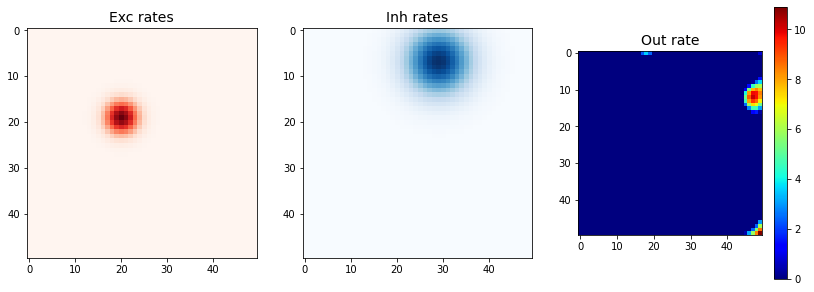

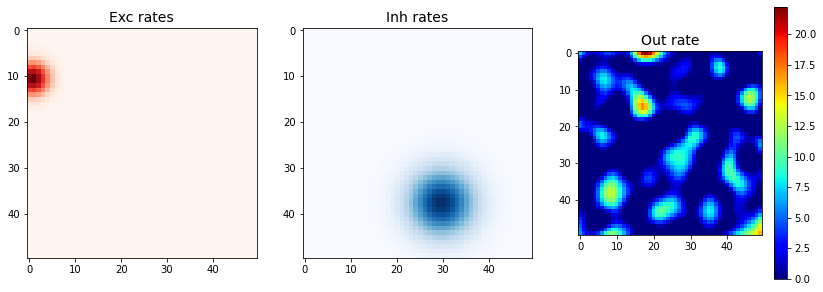

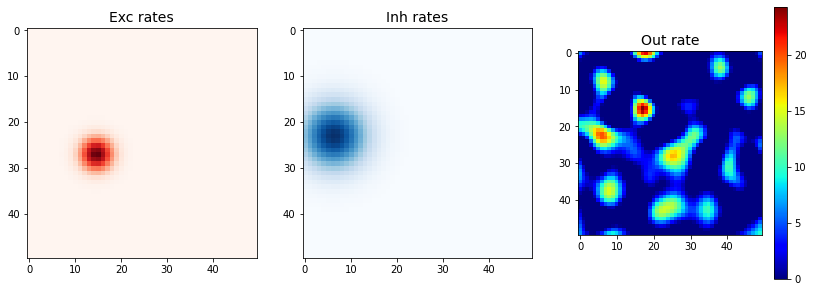

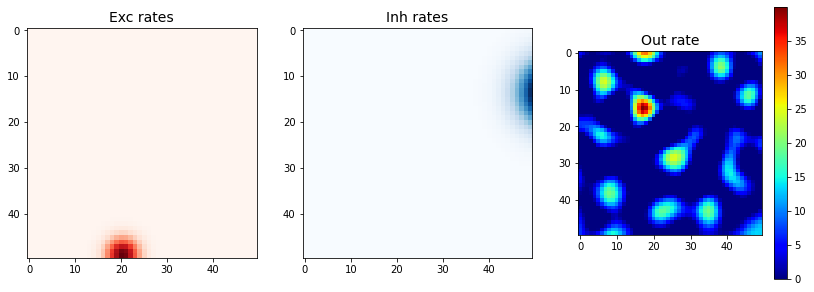

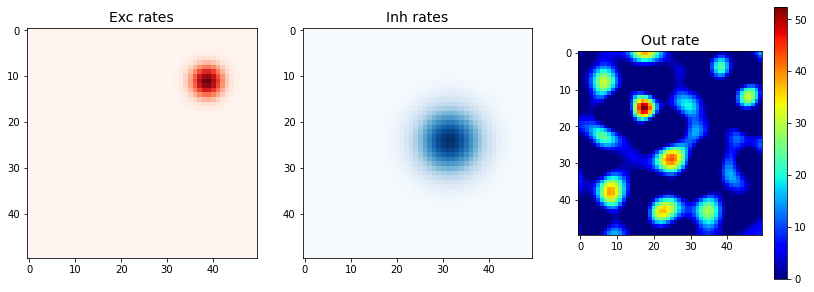

In [10]:
plot_every = 20000
total_iters = 0
n_steps = 100000
obs, state = envsimple.reset()
for i in tqdm(range(n_steps)):
    # Observe to choose an action
    obs = obs[:2]
    action = agentsimple.act(obs)
    # rate = agent.update()
    agentsimple.update()
    # Run environment for given action
    obs, state, reward = envsimple.step(action, normalize_step=True)
    total_iters += 1
    if i % plot_every == 0:
        agentsimple.plot_rates()

In [11]:
agentsimple.save_agent("nice_grid2.agent")

In [10]:
loaded_agent = Weber2018(model_name=model_name, exc_eta=exc_eta, inh_eta=inh_eta, sigma_exc=sigma_exc,
                        sigma_inh=sigma_inh, Ne=Ne, Ni=Ni, agent_step_size=agent_step_size, ro=1,
                        Nef=Nef, Nif=Nif, room_width=envsimple.room_width, room_depth=envsimple.room_depth,
                        alpha_i=alpha_i, alpha_e=alpha_e, we_init=we_init, wi_init=wi_init)

100%|██████████| 4900/4900 [00:01<00:00, 3677.28it/s]


In [11]:
loaded_agent.restore_agent("nice_grid.agent")

array([<AxesSubplot:title={'center':'Exc rates'}>,
       <AxesSubplot:title={'center':'Inh rates'}>,
       <AxesSubplot:title={'center':'Out rate'}>], dtype=object)

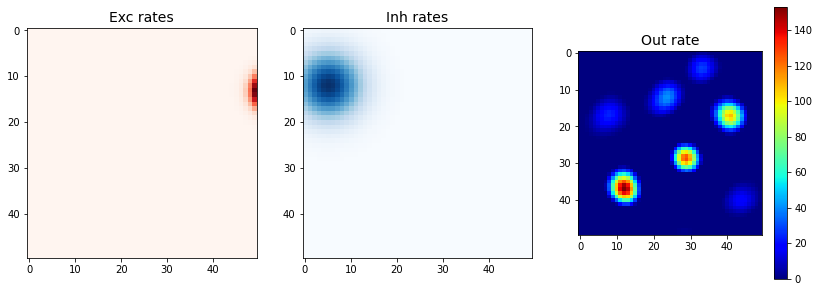

In [12]:
loaded_agent.plot_rates()

100%|██████████| 10000/10000 [00:41<00:00, 243.65it/s]


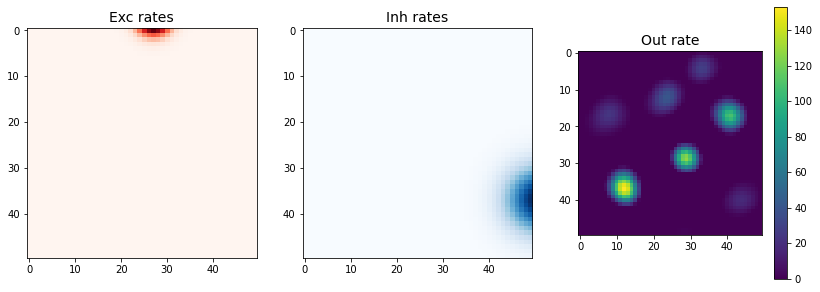

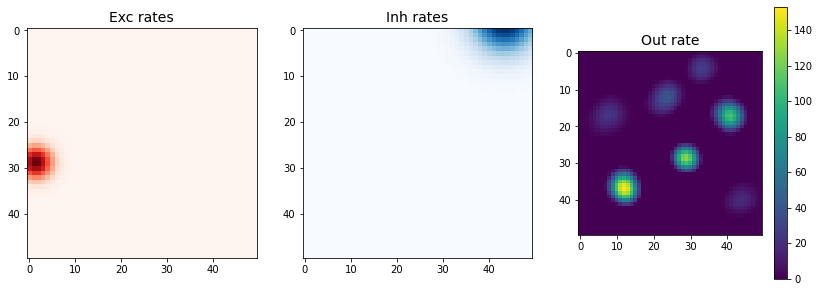

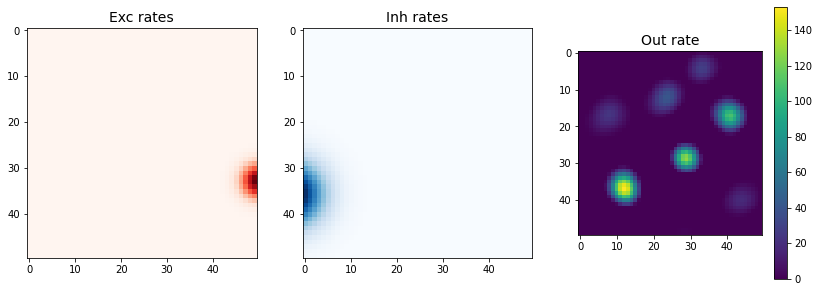

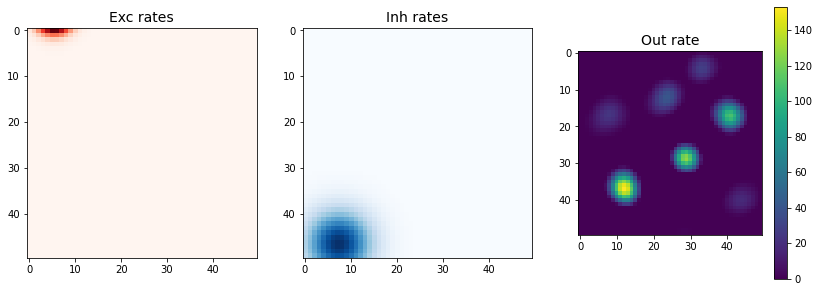

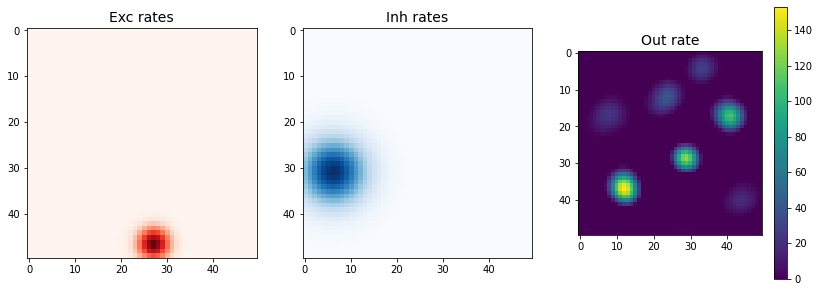

In [15]:
plot_every = 2000
total_iters = 0
n_steps = 10000
obs, state = envsimple.reset()
for i in tqdm(range(n_steps)):
    # Observe to choose an action
    obs = obs[:2]
    action = loaded_agent.act(obs)
    # rate = agent.update()
    loaded_agent.update()
    # Run environment for given action
    obs, state, reward = envsimple.step(action, normalize_step=True)
    total_iters += 1
    if i % plot_every == 0:
        agentsimple.plot_rates()